FileNotFoundError: [Errno 2] No such file or directory: 'figures/cumulative_coverage.pdf'

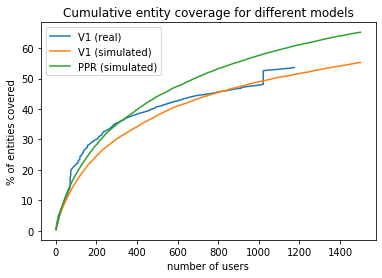

In [15]:
import json
import pandas as pd 
import matplotlib.pyplot as plt

all_uris = set(pd.read_csv('../data/entities.csv').uri)

def get_coverage(ratings):
    ratios = []
    user_counts = []
    seen_uris = set()
    
    for idx, user in enumerate(set(ratings.userId)):
        seen_uris.update(set(ratings[ratings.userId == user].uri))
        
        user_counts.append(idx + 1)
        ratios.append(len(seen_uris) / len(all_uris) * 100)

    return user_counts, ratios

ratings_file = json.load(open('../data/overview.json', 'r'))

for name, file in ratings_file.items():
    plt.plot(*get_coverage(pd.read_csv(file)), label=name)

plt.xlabel('number of users')
plt.ylabel('% of entities covered')
plt.title('Cumulative entity coverage for different models')
plt.legend()
plt.savefig('figures/cumulative_coverage.pdf', bbox_inches='tight')
plt.show()
